<a href="https://colab.research.google.com/github/YagoAndrade/cardio/blob/main/cardio" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
# Description: This program classifies if a person has a cardiovascular disease or not.

In [186]:
# Libraries used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [187]:
from google.colab import files # Load the data in .csv format
uploaded = files.upload()

In [188]:
df = pd.read_csv('cardiodata.csv')
df = df.dropna()

In [189]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender,smoke,alco,active,cardio
count,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000,68030.000000
mean,0.670793,0.560807,0.333974,0.708440,0.582010,0.135587,0.114626,0.073600,0.076055,0.348714,0.088005,0.053579,0.803572,0.494899
std,0.191185,0.042095,0.075844,0.045869,0.038053,0.342352,0.318572,0.261121,0.265088,0.476567,0.283305,0.225187,0.397299,0.499978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.530701,0.533333,0.285714,0.692308,0.576923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.689199,0.564103,0.322751,0.692308,0.576923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.814944,0.589744,0.375661,0.743590,0.615385,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0.0    34362
1.0    33668
Name: cardio, dtype: int64

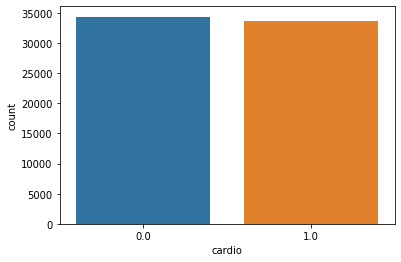

In [190]:
# Make a graph showing the number of individuals with cardiovascular diseases and show the numbers.
sns.countplot(x=df['cardio'])
df['cardio'].value_counts()

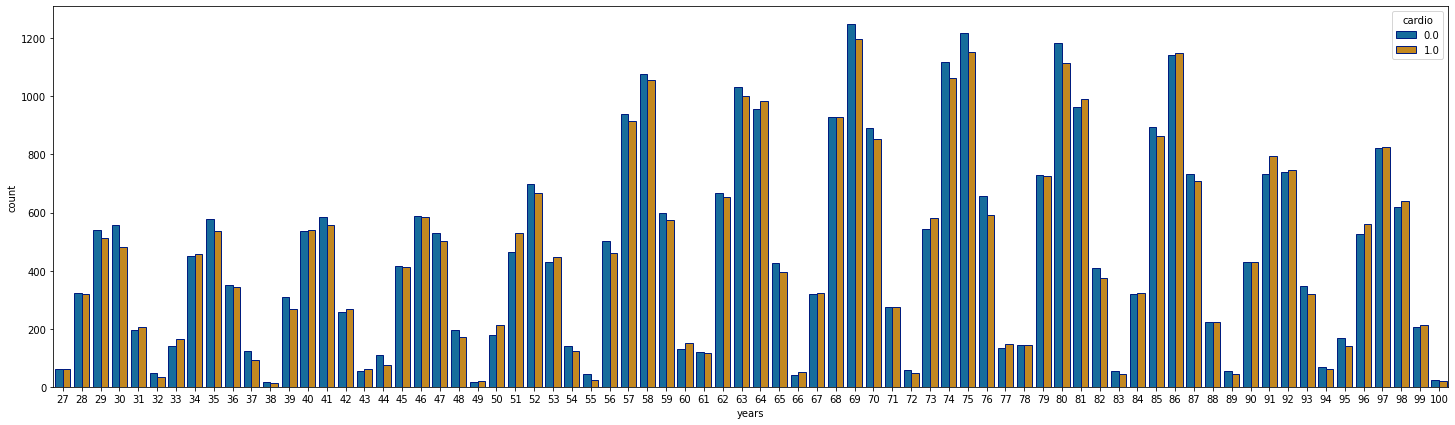

In [191]:
# Make a new column that holds a "years of age" value.
df['years'] = (df['age'] * 100).round(0)
df['years'] = pd.to_numeric(df['years'], downcast='integer')

# Show, in a graphic, the relationship of an individual's age and having cardiovascular diseases.
plt.figure(figsize = (25,7))
sns.countplot(x = "years", data=df[(df.years > 1)], hue = 'cardio', palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors=1))

# Remove the years column
df = df.drop('years', axis = 1)

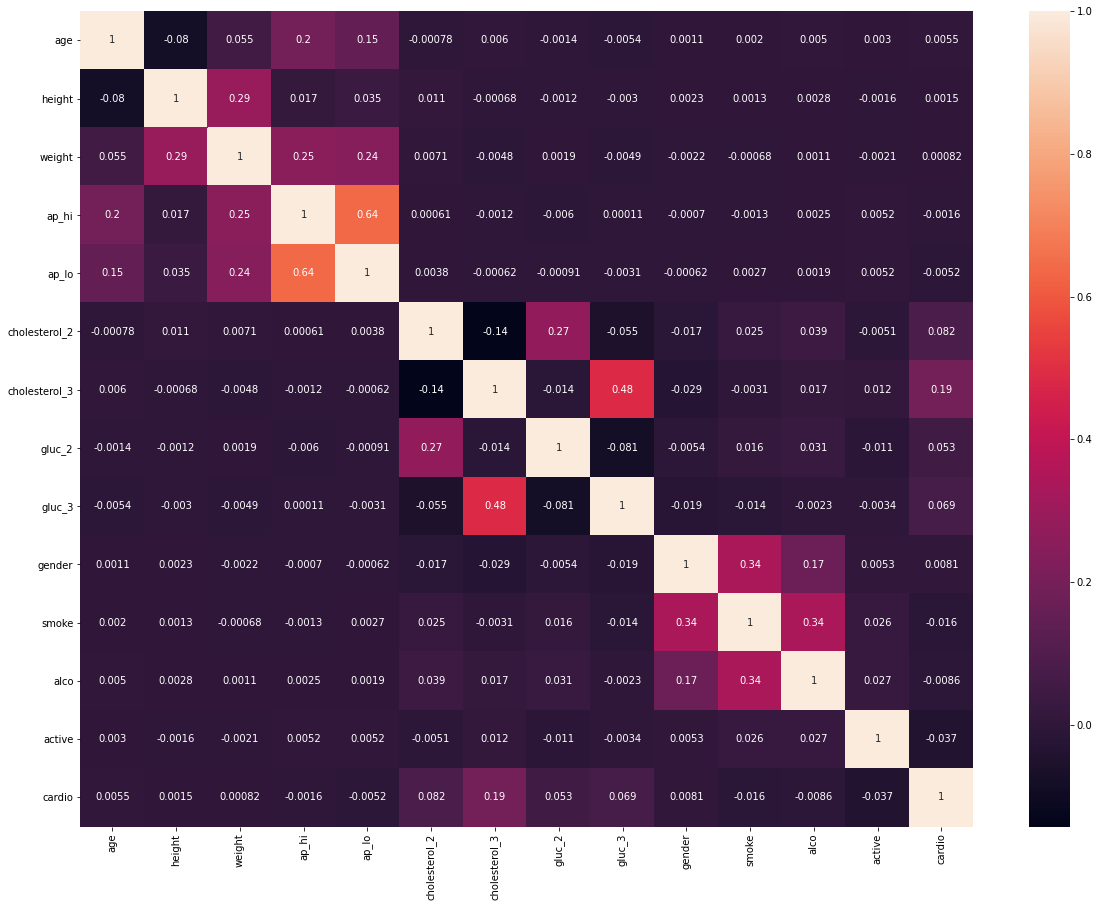

In [192]:
# Check correlations between data
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [193]:
# Evaluating model
def evaluate(C, X_test, Y_test):
    y_pred = C.predict(X_test)
    
    k_fold = KFold(10, shuffle = False, random_state = 0) #10-fold cross-validation
    cv_scores = cross_val_score(C, X_test, Y_test.ravel(), cv = k_fold)

    print("Cross-validation score means: ", cv_scores.mean())
    
    print("Accuracy: ", accuracy_score(Y_test, y_pred))
    
    print(classification_report(Y_test, y_pred))

In [194]:
# Dividing data between resource data and target data
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [195]:
# Dividing data again, 80% in training data and 20% in test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [196]:
# Feature scaling (escalar os valores nos dados para valores entre 0 e 1 inclusivo)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [197]:
# Usar Random Forest Classifier da biblioteca sklearn

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [198]:
# Test model precision in training data
model = forest
model.score(X_train, Y_train)

0.979163604292224

In [200]:
# Training a random forest classifier
C = RandomForestClassifier(n_estimators = 100)
C.fit(X_train, Y_train) #train classifier

evaluate(C, X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross-validation score means:  0.562472662834421
Accuracy:  0.5578421284727326
              precision    recall  f1-score   support

         0.0       0.56      0.59      0.57      6884
         1.0       0.56      0.52      0.54      6722

    accuracy                           0.56     13606
   macro avg       0.56      0.56      0.56     13606
weighted avg       0.56      0.56      0.56     13606



In [201]:
# Training a Gaussian Naive Bayes classifier
C = GaussianNB()
C.fit(X_train, Y_train) #train classifier

evaluate(C, X_test, Y_test)

Cross-validation score means:  0.5997353265332585
Accuracy:  0.5990004409819197
              precision    recall  f1-score   support

         0.0       0.57      0.81      0.67      6884
         1.0       0.66      0.39      0.49      6722

    accuracy                           0.60     13606
   macro avg       0.62      0.60      0.58     13606
weighted avg       0.62      0.60      0.58     13606



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [203]:
# Training KNN
C = KNeighborsClassifier(n_neighbors = 3)
C.fit(X_train, Y_train) #train classifier

evaluate(C, X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross-validation score means:  0.5365291524398149
Accuracy:  0.5484345141849184
              precision    recall  f1-score   support

         0.0       0.55      0.56      0.56      6884
         1.0       0.54      0.53      0.54      6722

    accuracy                           0.55     13606
   macro avg       0.55      0.55      0.55     13606
weighted avg       0.55      0.55      0.55     13606



In [204]:
# Training logistic regression model
C = LogisticRegression(solver = 'lbfgs')
C.fit(X_train, Y_train) #train classifier

evaluate(C, X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross-validation score means:  0.6000286337900333
Accuracy:  0.5997354108481552
              precision    recall  f1-score   support

         0.0       0.57      0.81      0.67      6884
         1.0       0.67      0.38      0.48      6722

    accuracy                           0.60     13606
   macro avg       0.62      0.60      0.58     13606
weighted avg       0.62      0.60      0.58     13606



In [ ]:
# Testing model precision in test data

cm = confusion_matrix(Y_test, model.predict(X_test))
true_negative = cm[0][0]
true_positive = cm[1][1]
false_negative = cm[1][0]
false_positive = cm[0][1]

# Print confusion_matrix's results
print(cm)

# Print test data precision
print('Test data precision: {}'.format((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)))